# Problem Statement

Wine Quality Prediction-
Here, we will apply a method of assessing wine quality using a decision tree, and test it against the wine-quality dataset from the UC Irvine Machine Learning Repository.



The wine dataset is a classic and very easy multi-class classification dataset.
Find more about data here - https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

In [1]:
#Import all the necessary modules
import pandas as pandas
import numpy as numpy
import os
import matplotlib.pyplot as matplot
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
import itertools

In [2]:
def plot_confusion_matrix(Y_test,Y_predict, target_names,title='Confusion matrix',cmap=None,normalize=True):
    cm = metrics.confusion_matrix(Y_test, Y_predict)
    accuracy = numpy.trace(cm) / float(numpy.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = matplot.get_cmap('Blues')

    matplot.figure(figsize=(8, 6))
    matplot.imshow(cm, interpolation='nearest', cmap=cmap)
    matplot.title(title)
    matplot.colorbar()

    if target_names is not None:
        tick_marks = numpy.arange(len(target_names))
        matplot.xticks(tick_marks, target_names, rotation=45)
        matplot.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, numpy.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            matplot.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            matplot.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    matplot.tight_layout()
    matplot.ylabel('True label')
    matplot.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    matplot.show()
    print(metrics.classification_report(Y_test, Y_predict))

In [3]:
os.chdir("C:\Siddhartha\Personal Documents\BOK\AIML")

# Q1. Load the Wine Data file into Python DataFrame. 


Let us assume the data frame is named wine_df


In [4]:
wine_df = pandas.read_csv("winequality-red.csv")

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset.

# Q2. Print 10 samples from the dataset

In [5]:
wine_df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


# Q3 Print the datatypes of each column and the shape of the dataset 

In [6]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
wine_df["quality"] = pandas.Categorical(wine_df["quality"])

In [8]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null category
dtypes: category(1), float64(11)
memory usage: 139.3 KB


In [9]:
wine_df.shape

(1599, 12)

# Q4 Print the descriptive statistics of each & every column using describe() function

In [10]:
(wine_df.describe()).T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


# Q5 Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes).

In [11]:
wine_df.kurtosis()

fixed acidity            1.132143
volatile acidity         1.225542
citric acid             -0.788998
residual sugar          28.617595
chlorides               41.715787
free sulfur dioxide      2.023562
total sulfur dioxide     3.809824
density                  0.934079
pH                       0.806943
sulphates               11.720251
alcohol                  0.200029
quality                  0.296708
dtype: float64

In [12]:
wine_df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

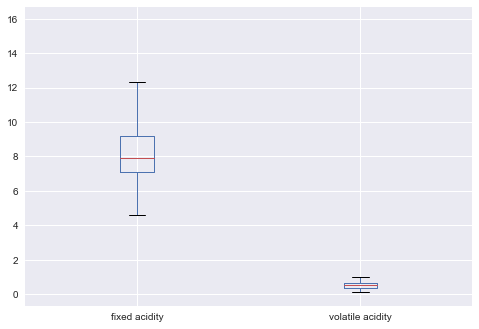

In [13]:
wine_df[["fixed acidity","volatile acidity"]].boxplot()

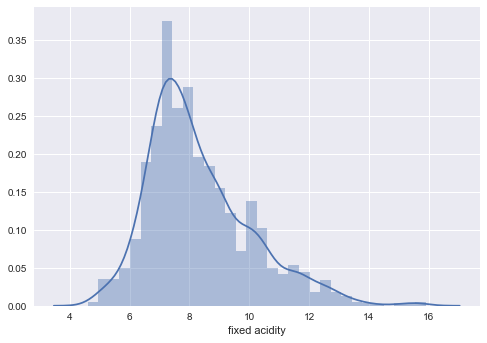

In [14]:
sns.distplot(wine_df["fixed acidity"])

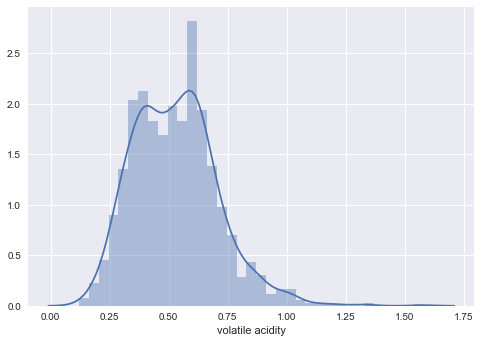

In [15]:
sns.distplot(wine_df["volatile acidity"])

In [16]:
print(wine_df[["fixed acidity","volatile acidity"]].mode())

   fixed acidity  volatile acidity
0            7.2               0.6


In [17]:
print(wine_df["fixed acidity"].max()-wine_df["fixed acidity"].min())
print(wine_df["volatile acidity"].max()-wine_df["volatile acidity"].min())

11.3
1.46


Inference :
    The two columns picked up are "fixed acidity" and "volatile acidity"
    
    fixed acidity :
    1. The data is shows a positive skewness and the skeness is 0.98
    2. There is a small peak in the range of 10 to 10.5 suggesting that there could be a possible gaussian mixture
    3. box plot suggests that there are no outliers
    4. Kurtois is positive 1.13 suggests that the data is distributed around the tail
    5. Mean = 8.31, median = 7.9, std = 1.74, mode = 7.2, range = 11.3
    
    Volatile acidity :
    1. The data is shows a positive skewness and the skeness is 0.67
    2. There distribution shows a double peak in the range of 40 suggesting that there could be a gaussian mixture
    3. box plot suggests that there are no outliers
    4. Kurtois is positive 1.22 suggests that the data is distributed around the tail
    5. Mean = 0.5278, median = 0.52, std = 0.179, mode = 0.6, range = 1.46

# Q6. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


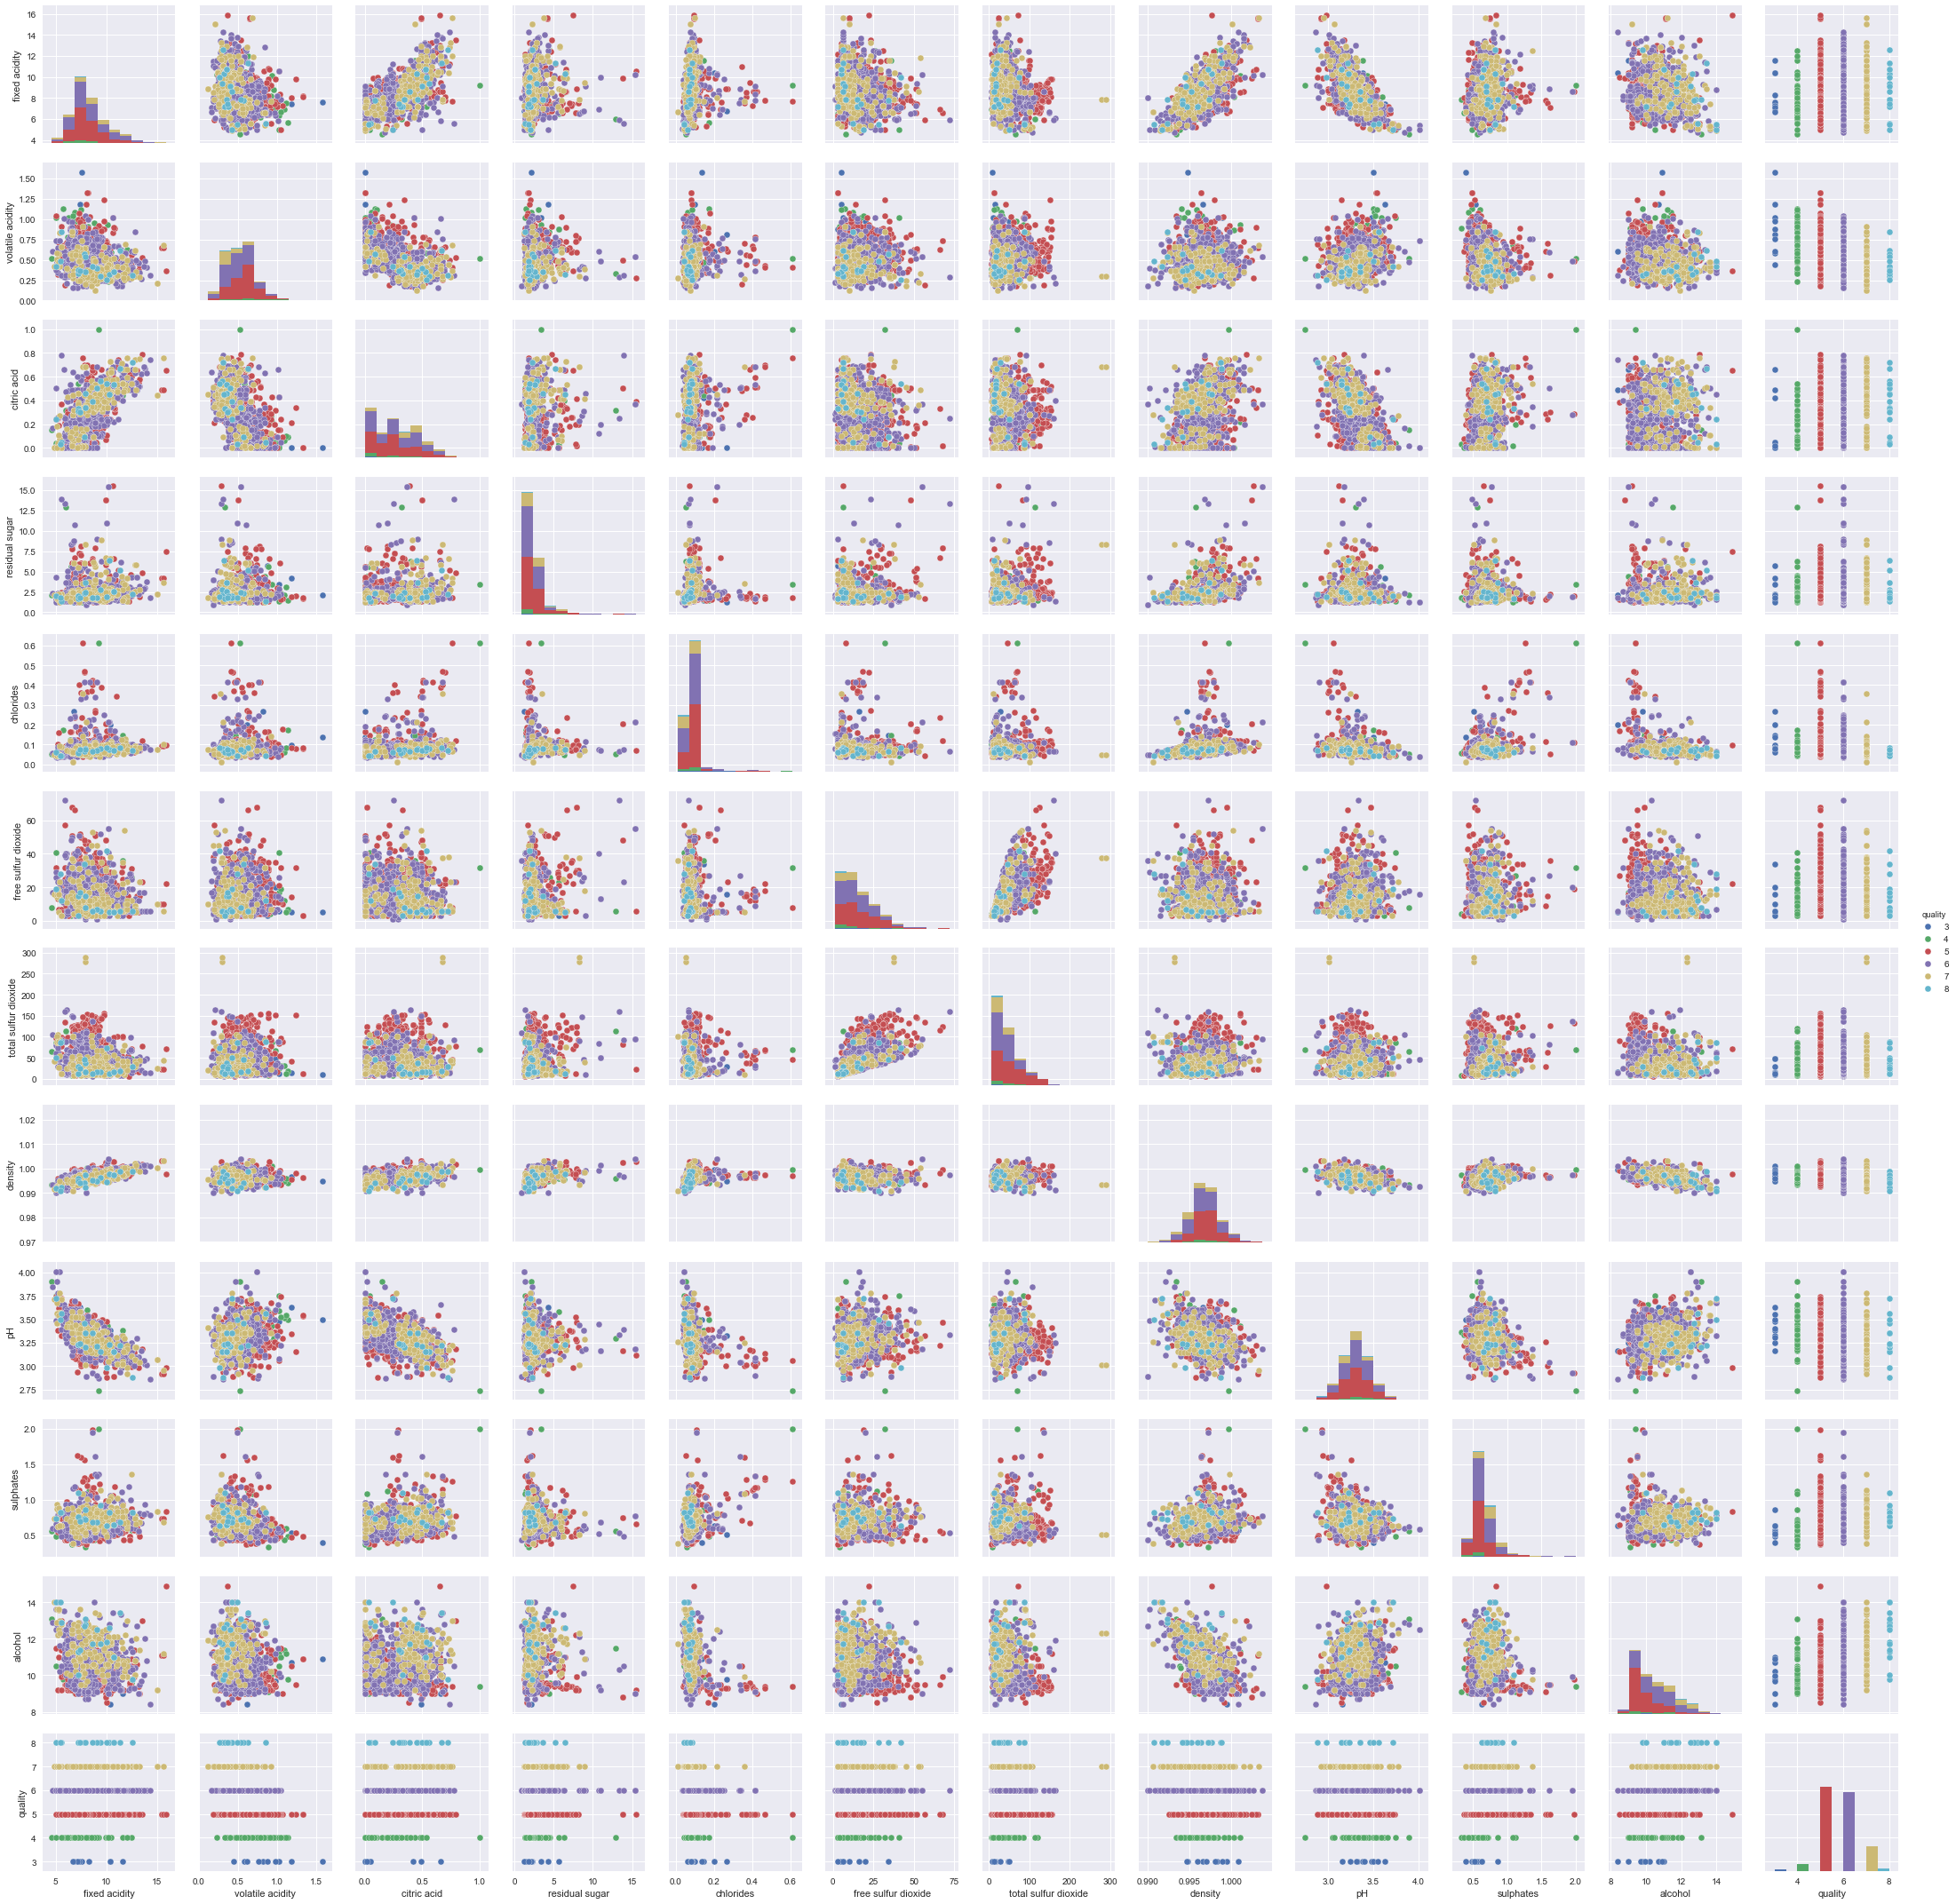

In [18]:
sns.pairplot(wine_df, hue = "quality")

In [19]:
wine_df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


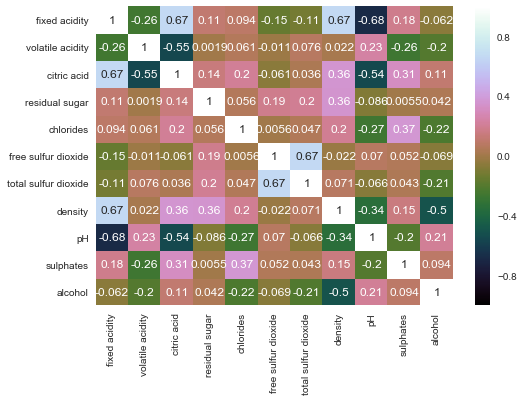

In [20]:
sns.heatmap(wine_df.corr(),annot=True,vmin=-1,vmax=1,cmap='cubehelix')

Inference :
1. "fixed acidity" has a moderate to strong positive correlation with "Citric Acid", "Density"
2. "fixed acidity" has a moderate to ,strong negative correlation with "pH"
3. "Volatile acidity" has a moderate to strong negative correlation with "cirtic acid"
4. "Citric Acid" has a moderate to strong negative correlation with "pH"
5. "residual sugar","Chlorides" and "Sulphates" has no inferential relationship with any other features
6. "free sulphur dioxide" has a moderate to strong positive correlation with "total sulphur dioxide"
7. "Alchohol" has a moderate negative correlation with "density"
8. Similar mixture of "qulaity" observed in each features and hence no one feature can be a strong predictor to determine wine quality


# Q7 Split the wine_df into training and test set in the ratio of 70:30 (Training:Test) based on dependent and independent variables.



Check the ratio of quality levels in the data set to ensure that post train test split, the ratios are maintained. This is just a sanity check as Sklearn train_test_split function will anyways ensure the same.

In [21]:
ratio = pandas.DataFrame(wine_df["quality"].value_counts())
ratio["Ratio"] = (ratio["quality"]/1599)*100
ratio

,quality,Ratio
5,681,42.589118
6,638,39.899937
7,199,12.445278
4,53,3.314572
8,18,1.125704
3,10,0.625391


The above mixture suggests, overall accuracy may not make sense for this use case and class level accuracy will provide more insights

In [22]:
Y = pandas.DataFrame(wine_df["quality"])
X = wine_df.iloc[:,0:11]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state=100)

Post train test split, ensure the ratio of quality levels in the data set is maintained

In [23]:
ratio_train = pandas.DataFrame(Y_train["quality"].value_counts())
ratio_train["Ratio"] = (ratio_train["quality"]/1119)*100
ratio_train

,quality,Ratio
5,477,42.627346
6,445,39.767650
7,140,12.511171
4,36,3.217158
8,14,1.251117
3,7,0.625559


# Q8 Create the decision tree model using “entropy” method of finding the split columns and fit it to training data.




In [24]:
dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [25]:
train_char_label = ["3","4","5","6","7","8"]

In [26]:
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

Wine_Tree_File = open('wine.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Wine_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Wine_Tree_File.close()


# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pandas.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                           Imp
fixed acidity         0.054419
volatile acidity      0.111846
citric acid           0.065631
residual sugar        0.089732
chlorides             0.086923
free sulfur dioxide   0.049741
total sulfur dioxide  0.082017
density               0.048606
pH                    0.087799
sulphates             0.129757
alcohol               0.193530


In [27]:
Y_predict = dt_model.predict(X_test)

# Q9 Print the accuracy of the model & print the confusion matrix 

In [28]:
print(dt_model.score(X_train , Y_train))
print(dt_model.score(X_test, Y_test))

1.0
0.6020833333333333


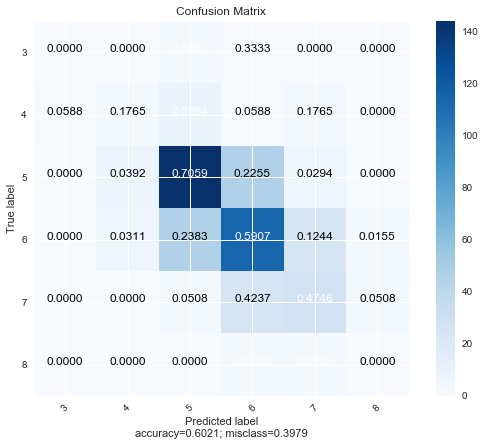

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         3
          4       0.18      0.18      0.18        17
          5       0.71      0.71      0.71       204
          6       0.60      0.59      0.60       193
          7       0.44      0.47      0.46        59
          8       0.00      0.00      0.00         4

avg / total       0.60      0.60      0.60       480



In [29]:
plot_confusion_matrix(Y_test, Y_predict, train_char_label,title = "Confusion Matrix", cmap = None, normalize= True)

# Q10. Regularize the decision tree by limiting the max. depth of trees and print the accuracy.

In [30]:
reg_dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7)
reg_dt_model.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [31]:
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

Wine_Tree_File = open('wine_reg.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file=Wine_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Wine_Tree_File.close()


# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pandas.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                           Imp
fixed acidity         0.051219
volatile acidity      0.104431
citric acid           0.026479
residual sugar        0.074396
chlorides             0.068628
free sulfur dioxide   0.045798
total sulfur dioxide  0.066394
density               0.014400
pH                    0.072676
sulphates             0.164233
alcohol               0.311347


In [32]:
Y_predict_reg = reg_dt_model.predict(X_test)

In [33]:
print(reg_dt_model.score(X_train , Y_train))
print(reg_dt_model.score(X_test, Y_test))

0.7524575513851653
0.5895833333333333


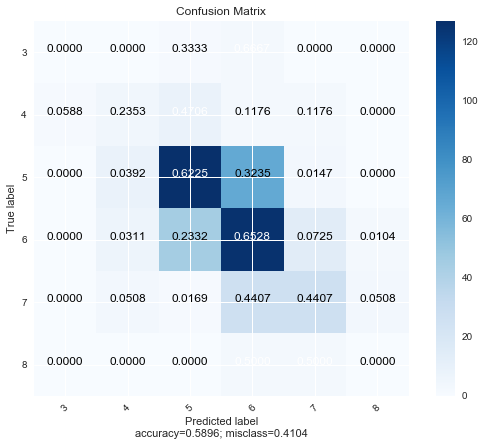

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         3
          4       0.19      0.24      0.21        17
          5       0.70      0.62      0.66       204
          6       0.56      0.65      0.60       193
          7       0.55      0.44      0.49        59
          8       0.00      0.00      0.00         4

avg / total       0.60      0.59      0.59       480



In [34]:
plot_confusion_matrix(Y_test, Y_predict_reg, train_char_label,title = "Confusion Matrix", cmap = None, normalize= True)

# Q11 Apply the Random forest model and print the accuracy of Random forest Model

1.0
0.6708333333333333


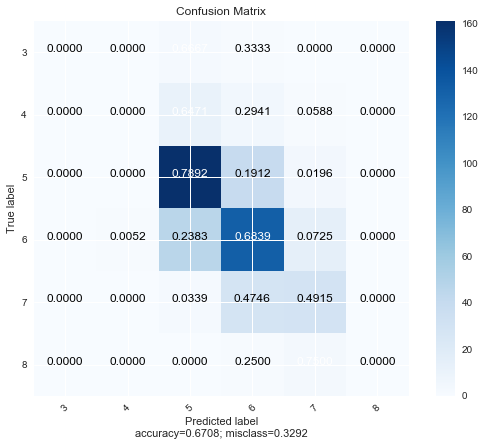

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         3
          4       0.00      0.00      0.00        17
          5       0.73      0.79      0.76       204
          6       0.64      0.68      0.66       193
          7       0.57      0.49      0.53        59
          8       0.00      0.00      0.00         4

avg / total       0.64      0.67      0.65       480



In [35]:
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, Y_train)
Y_predict_rfcl = rfcl.predict(X_test)
print(rfcl.score(X_train , Y_train))
print(rfcl.score(X_test, Y_test))
plot_confusion_matrix(Y_test, Y_predict_rfcl, train_char_label,title = "Confusion Matrix", cmap = None, normalize= True)

In [36]:
print (pandas.DataFrame(rfcl.feature_importances_, columns = ["Imp"], index = X_train.columns))

                           Imp
fixed acidity         0.070297
volatile acidity      0.099647
citric acid           0.078320
residual sugar        0.071348
chlorides             0.085791
free sulfur dioxide   0.061799
total sulfur dioxide  0.105057
density               0.095920
pH                    0.073213
sulphates             0.113398
alcohol               0.145209


# Q12 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

1.0
0.6020833333333333


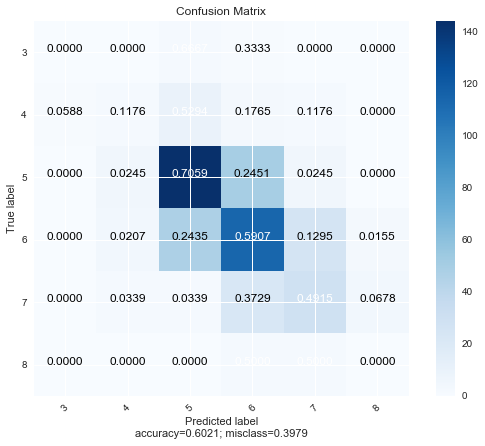

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         3
          4       0.15      0.12      0.13        17
          5       0.71      0.71      0.71       204
          6       0.59      0.59      0.59       193
          7       0.46      0.49      0.48        59
          8       0.00      0.00      0.00         4

avg / total       0.60      0.60      0.60       480



In [37]:
abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=10)
#abcl = AdaBoostClassifier( n_estimators=50)
abcl = abcl.fit(X_train, Y_train)
Y_predict_abcl = abcl.predict(X_test)
print(abcl.score(X_train , Y_train))
print(abcl.score(X_test, Y_test))
plot_confusion_matrix(Y_test, Y_predict_abcl, train_char_label,title = "Confusion Matrix", cmap = None, normalize= True)

In [38]:
print (pandas.DataFrame(abcl.feature_importances_, columns = ["Imp"], index = X_train.columns))

                           Imp
fixed acidity         0.053794
volatile acidity      0.106630
citric acid           0.063053
residual sugar        0.079503
chlorides             0.091065
free sulfur dioxide   0.061785
total sulfur dioxide  0.086451
density               0.060456
pH                    0.083440
sulphates             0.128356
alcohol               0.185467


1.0
0.6708333333333333


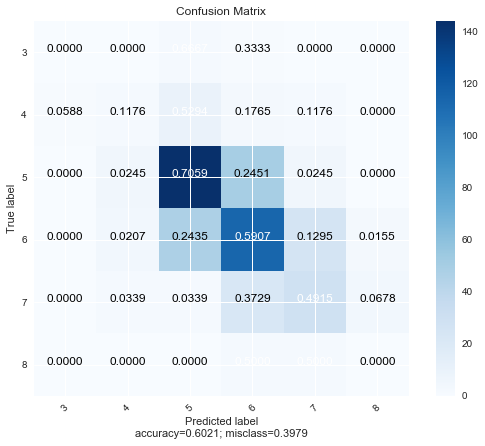

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         3
          4       0.15      0.12      0.13        17
          5       0.71      0.71      0.71       204
          6       0.59      0.59      0.59       193
          7       0.46      0.49      0.48        59
          8       0.00      0.00      0.00         4

avg / total       0.60      0.60      0.60       480



In [39]:
abcl1 = AdaBoostClassifier(base_estimator=rfcl, n_estimators=10)
#abcl = AdaBoostClassifier( n_estimators=50)
abcl1 = abcl1.fit(X_train, Y_train)
Y_predict_abcl1 = abcl.predict(X_test)
print(abcl1.score(X_train , Y_train))
print(abcl1.score(X_test, Y_test))
plot_confusion_matrix(Y_test, Y_predict_abcl1, train_char_label,title = "Confusion Matrix", cmap = None, normalize= True)

# Q13 - Apply Bagging Classifier Algorithm and print the accuracy.

0.9803395889186773
0.6541666666666667


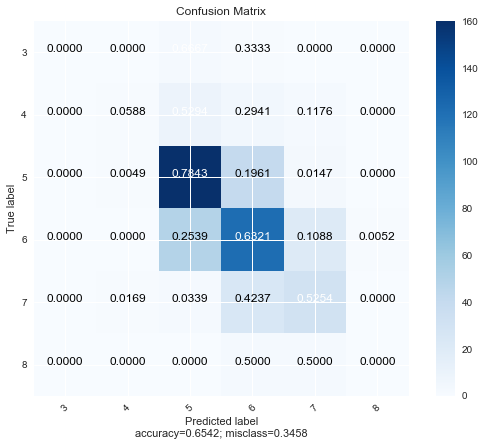

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         3
          4       0.33      0.06      0.10        17
          5       0.72      0.78      0.75       204
          6       0.63      0.63      0.63       193
          7       0.53      0.53      0.53        59
          8       0.00      0.00      0.00         4

avg / total       0.63      0.65      0.64       480



In [40]:
Bag = BaggingClassifier(base_estimator=dt_model, n_estimators=10)
#abcl = AdaBoostClassifier( n_estimators=50)
Bag = Bag.fit(X_train, Y_train)
Y_predict_Bag = Bag.predict(X_test)
print(Bag.score(X_train , Y_train))
print(Bag.score(X_test, Y_test))
plot_confusion_matrix(Y_test, Y_predict_Bag, train_char_label,title = "Confusion Matrix", cmap = None, normalize= True)

0.9794459338695264
0.6833333333333333


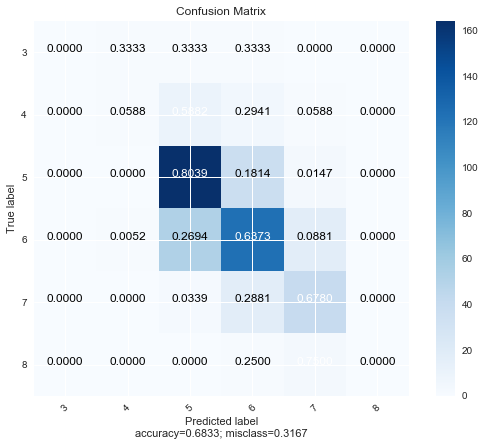

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         3
          4       0.33      0.06      0.10        17
          5       0.72      0.80      0.76       204
          6       0.67      0.64      0.65       193
          7       0.62      0.68      0.65        59
          8       0.00      0.00      0.00         4

avg / total       0.66      0.68      0.67       480



In [41]:
Bag1 = BaggingClassifier(base_estimator=rfcl, n_estimators=10)
#abcl = AdaBoostClassifier( n_estimators=50)
Bag1 = Bag.fit(X_train, Y_train)
Y_predict_Bag1 = Bag1.predict(X_test)
print(Bag1.score(X_train , Y_train))
print(Bag1.score(X_test, Y_test))
plot_confusion_matrix(Y_test, Y_predict_Bag1, train_char_label,title = "Confusion Matrix", cmap = None, normalize= True)

# Q14 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

0.8319928507596068
0.6625


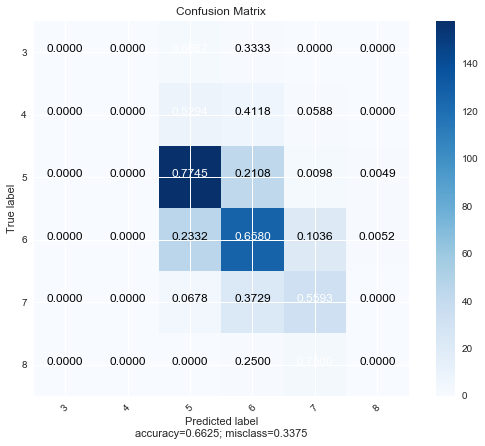

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         3
          4       0.00      0.00      0.00        17
          5       0.72      0.77      0.75       204
          6       0.63      0.66      0.64       193
          7       0.56      0.56      0.56        59
          8       0.00      0.00      0.00         4

avg / total       0.63      0.66      0.65       480



In [42]:
Grad = GradientBoostingClassifier(n_estimators=50)
#abcl = AdaBoostClassifier( n_estimators=50)
Grad = Grad.fit(X_train, Y_train)
Y_predict_Grad = Grad.predict(X_test)
print(Grad.score(X_train , Y_train))
print(Grad.score(X_test, Y_test))
plot_confusion_matrix(Y_test, Y_predict_Grad, train_char_label,title = "Confusion Matrix", cmap = None, normalize= True)

# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.